<a href="https://colab.research.google.com/github/ankitrahejagatech/7641HW1/blob/main/notebooks/ExplorationOfDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
bank_marketing = fetch_ucirepo(id=222)
from sklearn.preprocessing import OneHotEncoder
#bank_marketing = pd.read_csv('/Users/ankitraheja/PycharmProjects/CS7641HW1/data/bank-additional.csv', sep=';')
#bankmarketing_df = pd.DataFrame(bank_marketing)
#bankmarketing_df.to_csv('bankmarketing.csv', index=False)
#DataEncoding

#MissingDataStrategy

X1 = pd.DataFrame(bank_marketing.data.features, columns=bank_marketing.feature_names)


y1 = pd.DataFrame(bank_marketing.data.targets)

y1['y'] = y1['y'].replace({'yes': 1, 'no': 0})

Note: you may need to restart the kernel to use updated packages.


In [3]:
X1.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [4]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#cat_var =["job", "marital", "education", "contact", "month", "poutcome"]
#for i in cat_var:
#  X1[i]= le.fit_transform(X1[i])

# print(X1['age'].unique())
# print(X1['job'].unique()) #modify
# one_hot = pd.get_dummies(X1['job'], prefix='job')
# X1 = X1.drop('job', axis=1)
# X1 = pd.concat([X1, one_hot], axis=1)
# print(X1['marital'].unique()) #modify
# one_hot = pd.get_dummies(X1['marital'], prefix='marital')
# # Drop the original 'Color' column from 'df'
# X1 = X1.drop('marital', axis=1)
# X1 = pd.concat([X1, one_hot], axis=1)
# #X1['marital_encoded'] = encoder.fit_transform(X1['marital'])
# print(X1['education'].unique()) #modify ordinal
X1['education'] = X1['education'].replace({'primary': 0, 'secondary':1,'tertiary':2})
# print(X1['default'].unique())  #modify
X1['default'] = X1['default'].replace({'yes': 1, 'no':0})
# print(X1['balance'].unique())
# print(X1['housing'].unique())  #modify
X1['housing'] = X1['housing'].replace({'yes': 1, 'no':0})
# #print(X1['loan'].unique())  #modify
X1['loan'] = X1['loan'].replace({'yes': 1, 'no':0})
# print(X1['contact'].unique())  #modify
#
# print(X1['day_of_week'].unique())
# #print(X1['month'].unique())  #modify
X1['month'] = X1['month'].replace({'may':5 ,'jun':6, 'jul' :7, 'aug' :8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'sep':9})
# print(X1['duration'].unique())
# print(X1['campaign'].unique())
# print(X1['pdays'].unique())
# print(X1['previous'].unique())
# #print(X1['poutcome'].unique()) #modify
X1['poutcome'] = X1['poutcome'].replace({'success': 1, 'failure': -1,'other':0})



In [5]:
X1

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,2.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN
1,44,technician,single,1.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN
2,33,entrepreneur,married,1.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN
4,33,NaN,single,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2.0,0,825,0,0,cellular,17,11,977,3,-1,0,NaN
45207,71,retired,divorced,0.0,0,1729,0,0,cellular,17,11,456,2,-1,0,NaN
45208,72,retired,married,1.0,0,5715,0,0,cellular,17,11,1127,5,184,3,1.0
45209,57,blue-collar,married,1.0,0,668,0,0,telephone,17,11,508,4,-1,0,NaN


In [6]:
X1_train, X1_subset, y1_train, y1_subset = train_test_split(X1, y1, test_size=.3, random_state=42, stratify=y1)

In [7]:
# #handle missing data
# #Option 1 Remove Rows with Missing Data
# #X1 = X1.dropna()
# #Option 2 Remove Columns with Missing Data
# #X1 = X1.dropna(axis=1)
#Option 3 Fill with mean or fill with mode based on logic
X1_subset = X1_subset.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))
# #Option 4 Advanced Imputation Techniques
#     #IterativeImputer/MICE
# iterative_imputer = IterativeImputer(estimator=BayesianRidge())
# numeric_cols = X1_subset.select_dtypes(include=['number']).columns
# X1_subset[numeric_cols] = iterative_imputer.fit_transform(X1_subset[numeric_cols])
# X1_subset = X1_subset.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' or x.dtype.name == 'category' else x)
# one_hot = pd.get_dummies(X1_subset['contact'], prefix='contact')
# # Drop the original 'Color' column from 'df'
# X1_subset = X1_subset.drop('contact', axis=1)
# X1_subset = pd.concat([X1_subset, one_hot], axis=1)

In [8]:
for col in X1_subset.select_dtypes(include=['float64']).columns:
    X1_subset[col] = X1_subset[col].fillna(0).astype(int)

for col in y1_subset.select_dtypes(include=['float64']).columns:
    y1_subset[col] = y1_subset[col].fillna(0).astype(int)

In [9]:
 y1_subset['y'].value_counts()


y
0    11977
1     1587
Name: count, dtype: int64

In [10]:
breast_cancer = fetch_ucirepo(id=17)
#breast_cancer_df = pd.DataFrame(breast_cancer)
#breast_cancer_df.to_csv('breast_cancer.csv', index=False)
X2 = pd.DataFrame(breast_cancer.data.features, columns=breast_cancer.feature_names)
y2 = pd.DataFrame(breast_cancer.data.targets)

#print(y2.value_counts())
y2['Diagnosis'] = y2['Diagnosis'].replace({'M': 1, 'B': 0})

In [11]:
#bankmarketing
#education has missing values
#job has missing values
#contact has missing values
#poutcome has missing values
X1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13564 entries, 37735 to 37155
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          13564 non-null  int64 
 1   job          13564 non-null  object
 2   marital      13564 non-null  object
 3   education    13564 non-null  int64 
 4   default      13564 non-null  int64 
 5   balance      13564 non-null  int64 
 6   housing      13564 non-null  int64 
 7   loan         13564 non-null  int64 
 8   contact      13564 non-null  object
 9   day_of_week  13564 non-null  int64 
 10  month        13564 non-null  int64 
 11  duration     13564 non-null  int64 
 12  campaign     13564 non-null  int64 
 13  pdays        13564 non-null  int64 
 14  previous     13564 non-null  int64 
 15  poutcome     13564 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 1.8+ MB


In [12]:
#nomissingdata
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [13]:
X1_subset.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [14]:


X2.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [15]:
print(X1_subset.describe())

                age     education       default       balance       housing  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      41.060307      1.153937      0.018505   1359.198172      0.553303   
std       10.611005      0.648195      0.134773   2984.606051      0.497169   
min       18.000000      0.000000      0.000000  -3372.000000      0.000000   
25%       33.000000      1.000000      0.000000     68.000000      0.000000   
50%       39.000000      1.000000      0.000000    442.500000      1.000000   
75%       49.000000      2.000000      0.000000   1428.000000      1.000000   
max       93.000000      2.000000      1.000000  98417.000000      1.000000   

               loan   day_of_week         month      duration      campaign  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean       0.159982     15.805736      6.144574    256.781702      2.772707   
std        0.366603      8.302674      2.408565    

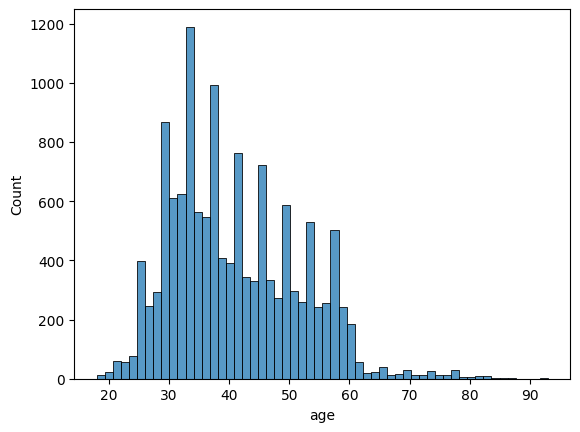

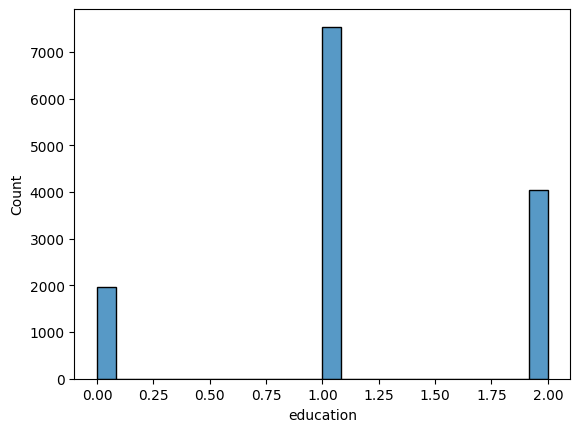

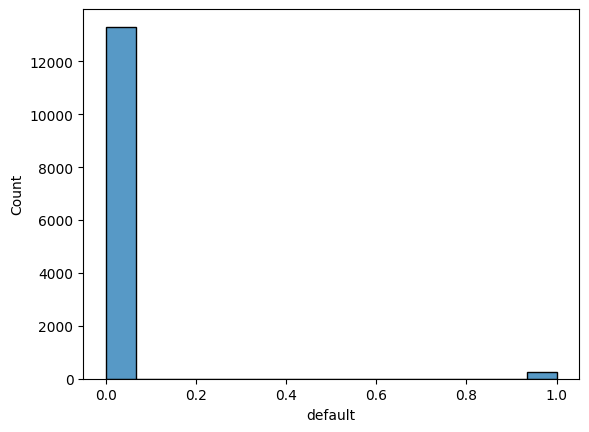

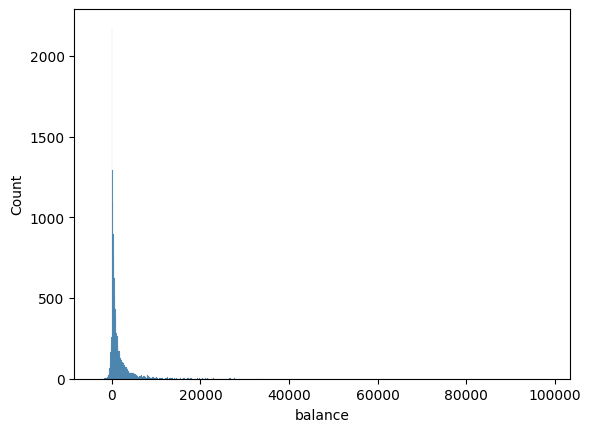

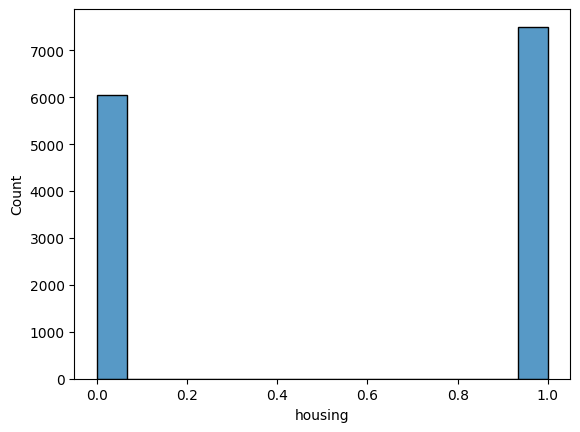

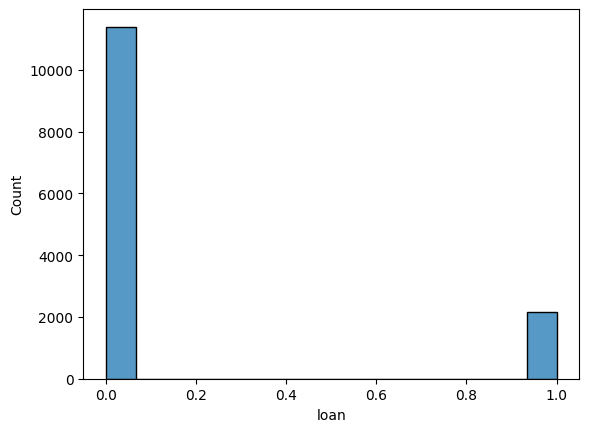

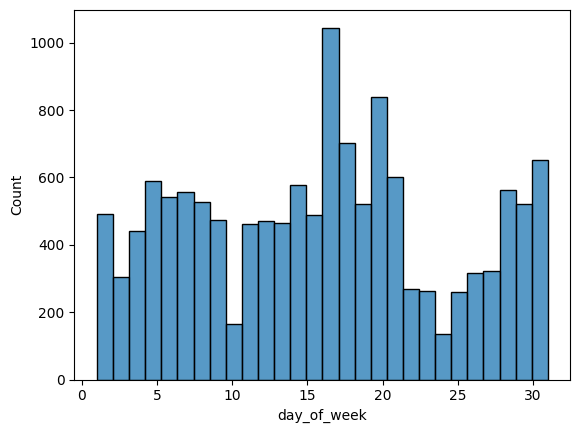

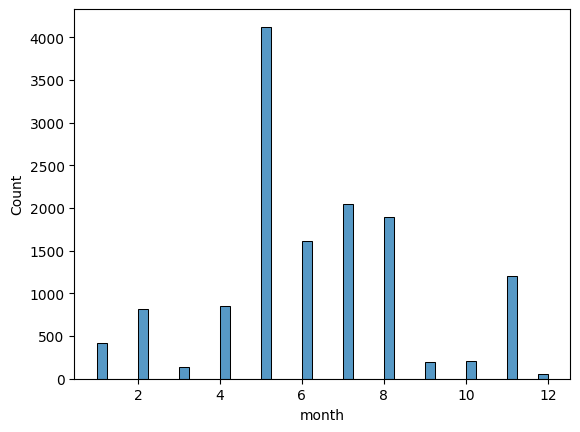

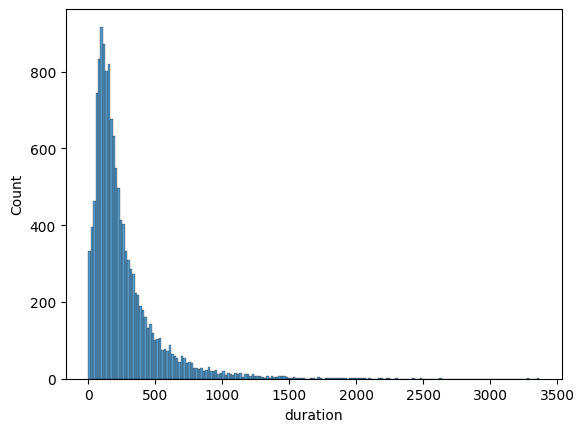

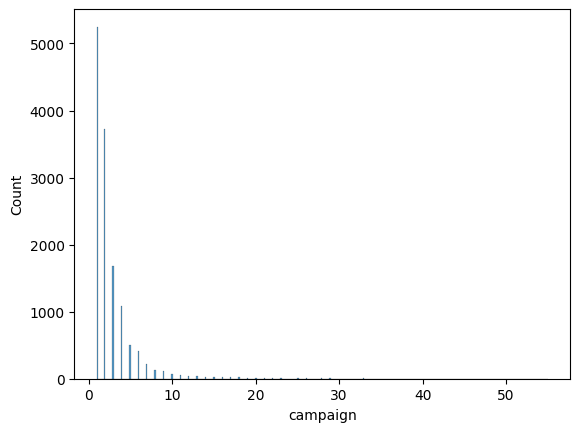

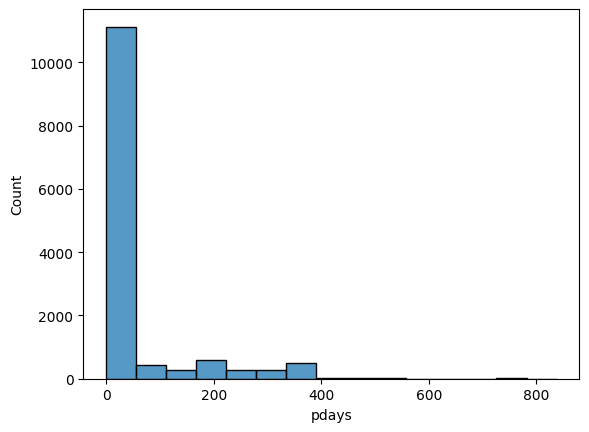

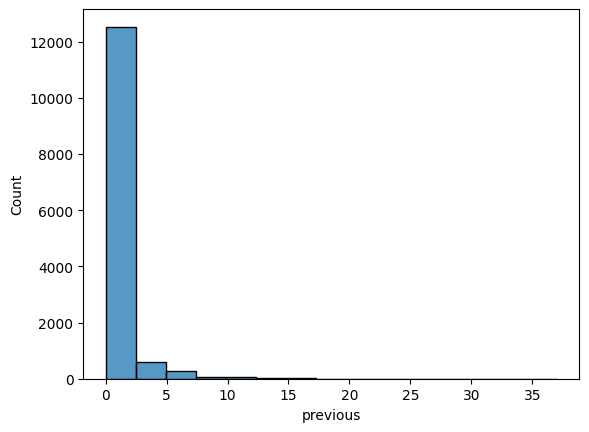

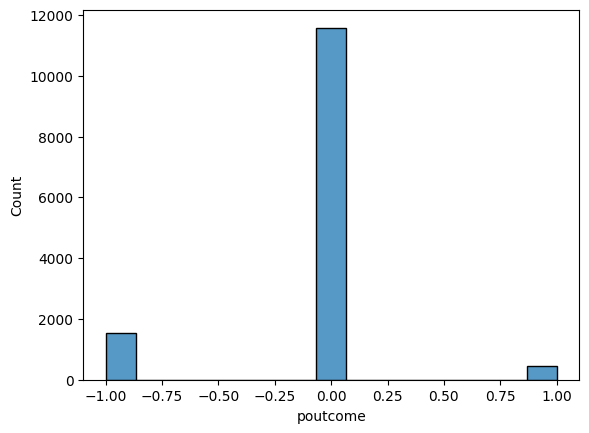

In [16]:
for column in X1_subset.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=X1_subset, x=column)
    plt.show()

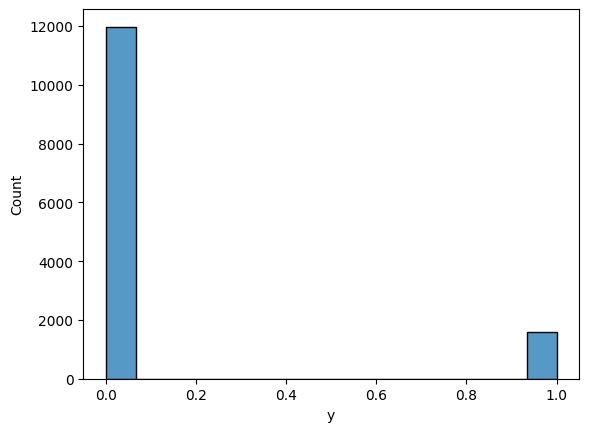

In [17]:

for column in y1_subset.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=y1_subset, x=column)
    plt.show()

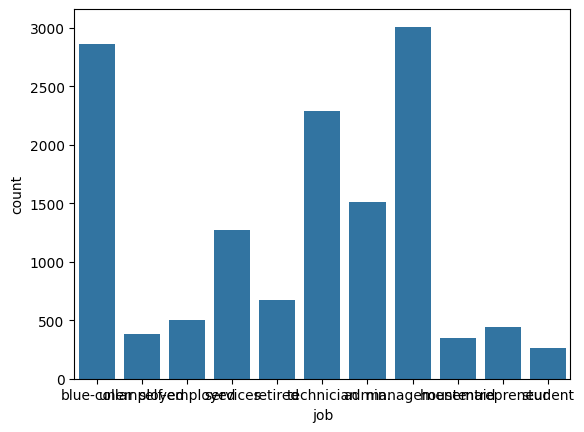

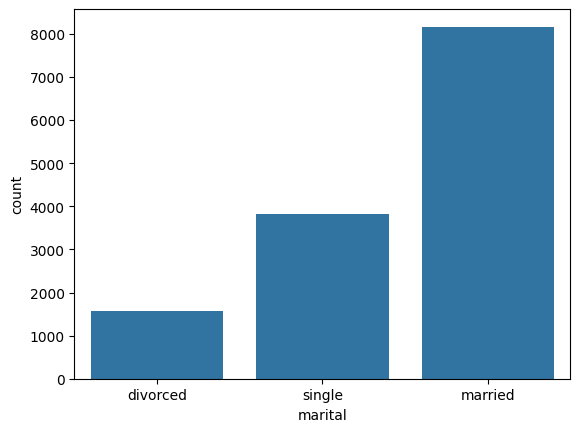

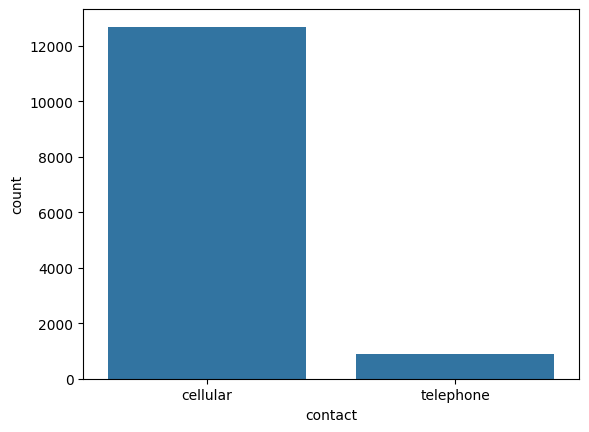

In [18]:
for column in X1_subset.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(data=X1_subset, x=column)
    plt.show()

In [19]:
def return_numerical(df):
    return df.select_dtypes(include=['int64', 'float64'])
X1_subset_numerical = return_numerical(X1_subset)

In [20]:
correlation_matrix = X1_subset_numerical.corr()

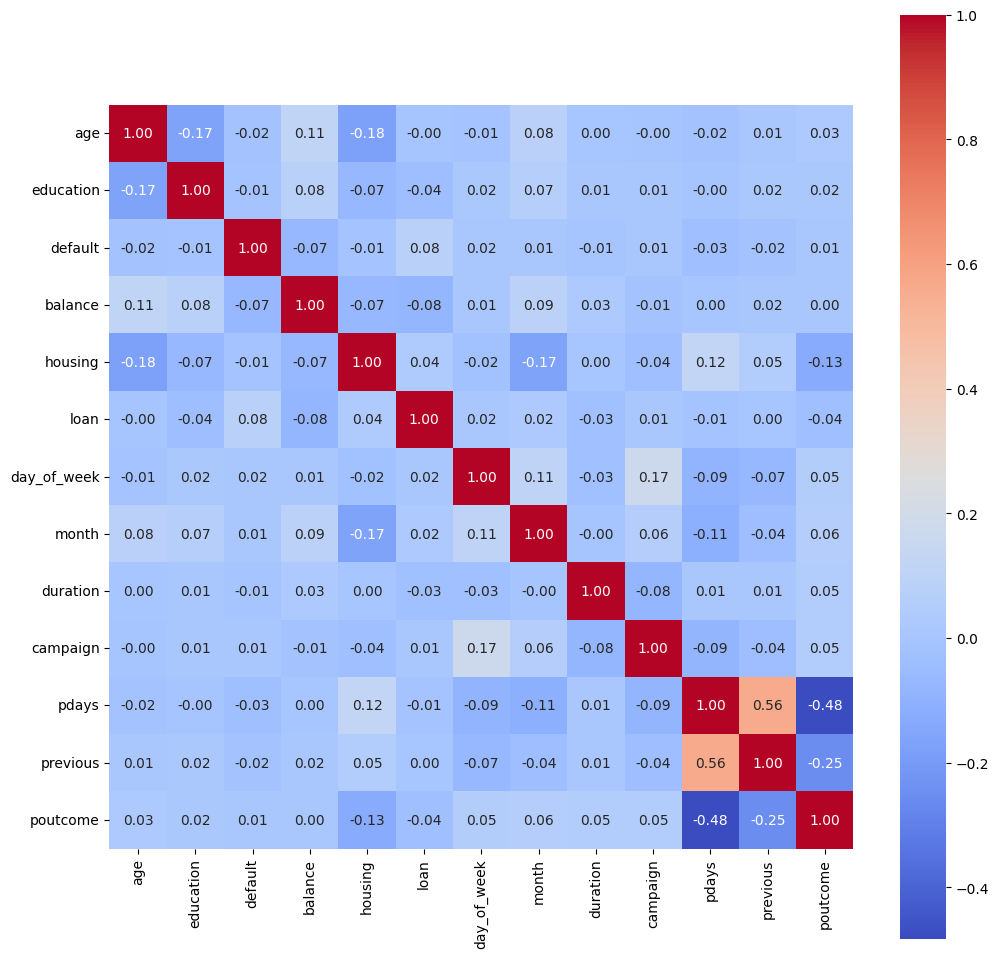

In [21]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

In [22]:
correlation_matrix=correlation_matrix.abs()

In [23]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
threshold = 0.5
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop highly correlated columns
X1_subset_reduced = X1_subset.drop(columns=to_drop)

print(f"Columns to drop: {to_drop}")
print(f"Reduced DataFrame shape: {X1_subset_reduced.shape}")

Columns to drop: ['previous']
Reduced DataFrame shape: (13564, 15)


In [24]:
# #To remove highly correlated variables in a dataset using Scikit-learn, you typically follow these steps:
#
# Calculate the correlation matrix.
# Identify pairs of highly correlated variables (e.g., with a correlation coefficient greater than a threshold).
# Remove one of each pair of highly correlated variables.
# Here is a step-by-step approach to achieve this using Scikit-learn along with Pandas:

In [25]:
X1_subset_reduced

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,poutcome
37735,40,blue-collar,divorced,1,0,973,0,0,cellular,14,5,449,1,-1,0
44332,35,unemployed,single,2,0,154,0,0,cellular,29,7,200,4,181,-1
4432,38,self-employed,married,1,0,736,1,0,cellular,20,5,775,1,-1,0
38725,35,blue-collar,married,1,0,205,1,1,cellular,15,5,1313,7,312,-1
38581,44,services,single,1,0,532,1,0,cellular,15,5,550,2,340,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,40,services,married,1,0,939,1,0,cellular,22,7,87,3,-1,0
20622,38,management,married,2,0,1223,0,0,cellular,12,8,1092,5,-1,0
41684,50,blue-collar,married,0,0,383,0,0,telephone,2,10,382,2,-1,0
32749,38,technician,single,2,0,2273,1,0,cellular,17,4,222,1,-1,0


In [26]:
print("index of duplicated rows : ",list(X1_subset_reduced[X1_subset_reduced.duplicated()].index))
X1_subset_reduced = X1_subset_reduced.drop_duplicates()

index of duplicated rows :  []


In [27]:
X1_subset_reduced


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,poutcome
37735,40,blue-collar,divorced,1,0,973,0,0,cellular,14,5,449,1,-1,0
44332,35,unemployed,single,2,0,154,0,0,cellular,29,7,200,4,181,-1
4432,38,self-employed,married,1,0,736,1,0,cellular,20,5,775,1,-1,0
38725,35,blue-collar,married,1,0,205,1,1,cellular,15,5,1313,7,312,-1
38581,44,services,single,1,0,532,1,0,cellular,15,5,550,2,340,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,40,services,married,1,0,939,1,0,cellular,22,7,87,3,-1,0
20622,38,management,married,2,0,1223,0,0,cellular,12,8,1092,5,-1,0
41684,50,blue-collar,married,0,0,383,0,0,telephone,2,10,382,2,-1,0
32749,38,technician,single,2,0,2273,1,0,cellular,17,4,222,1,-1,0


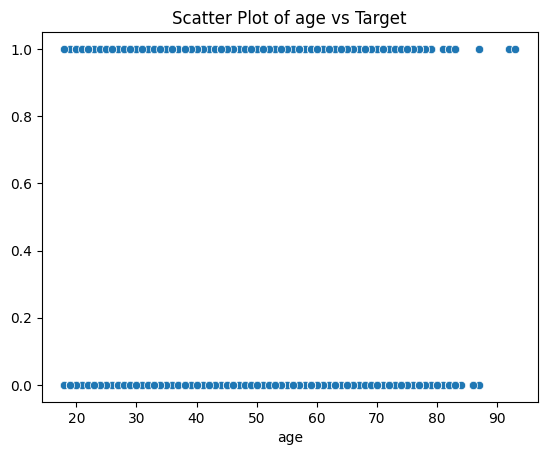

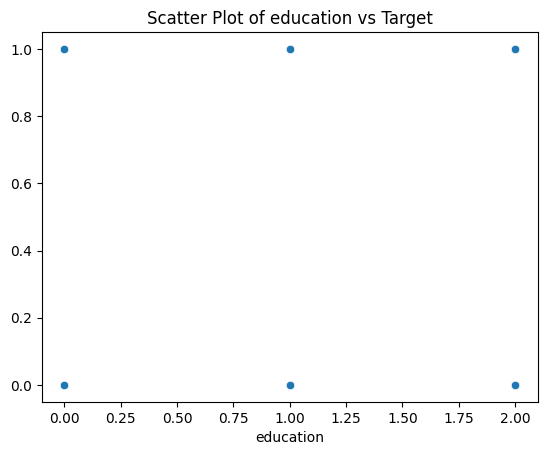

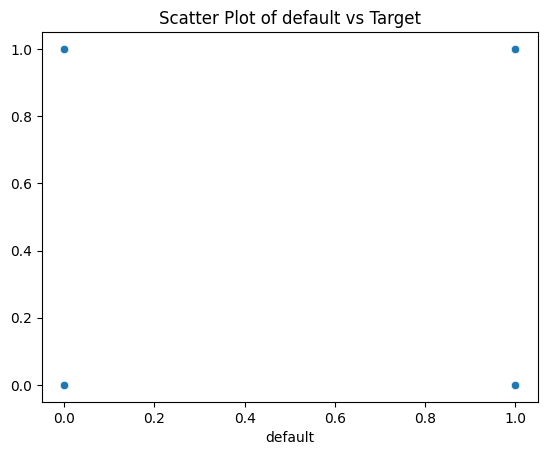

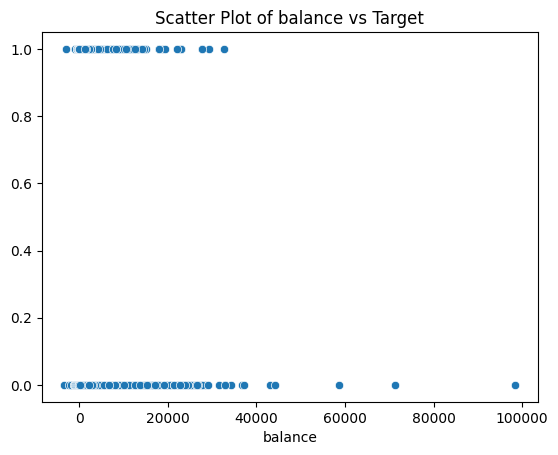

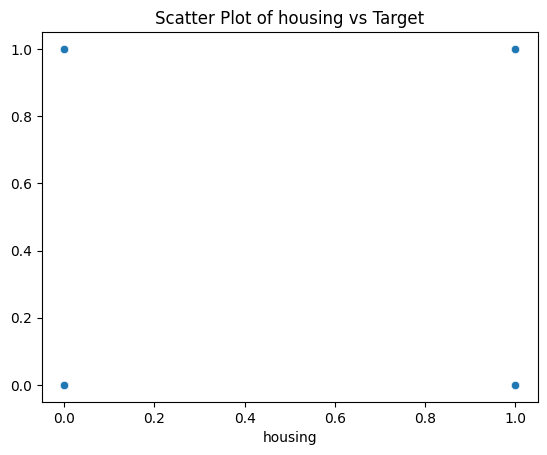

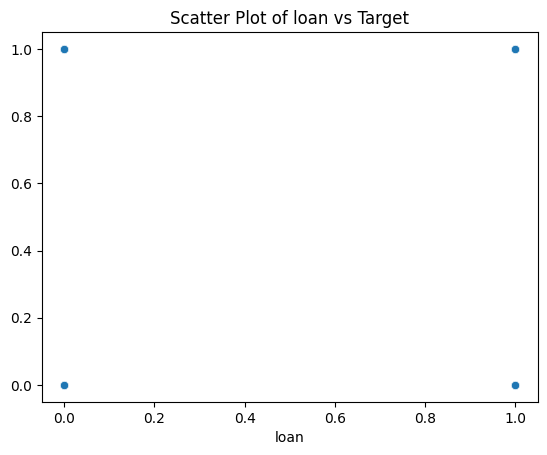

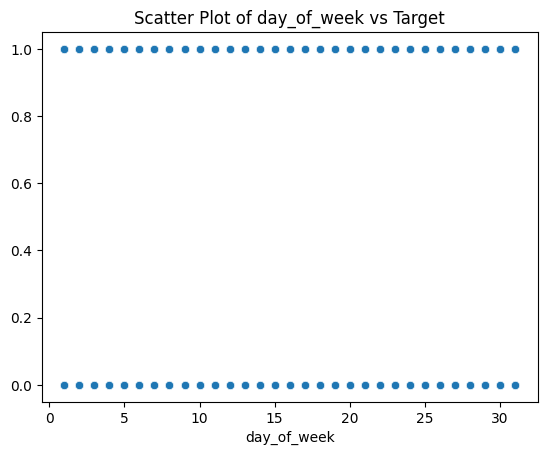

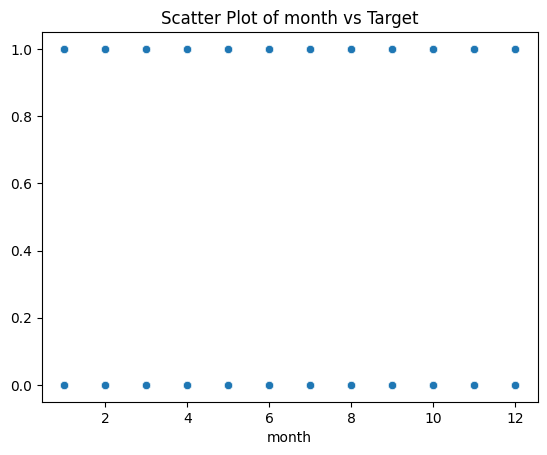

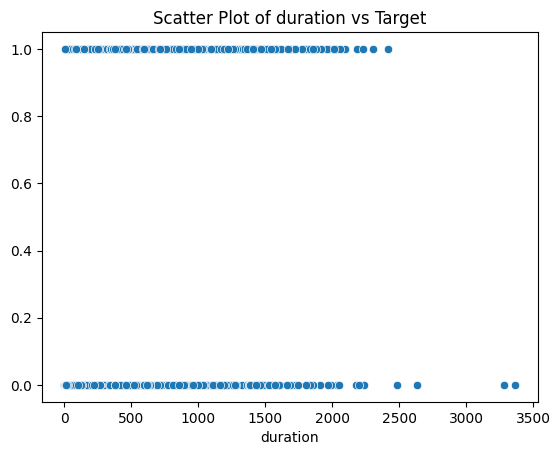

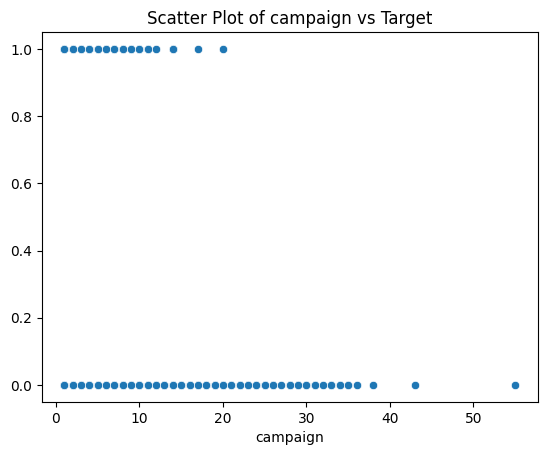

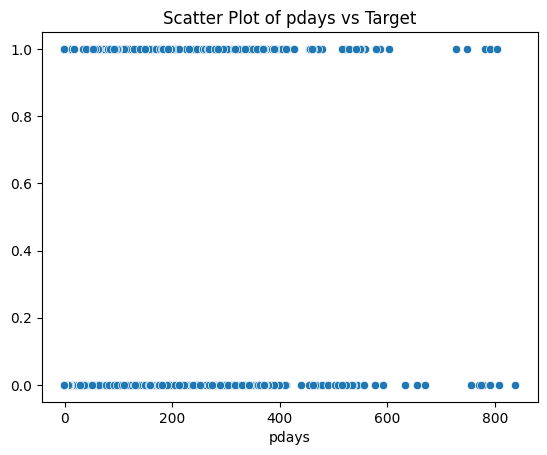

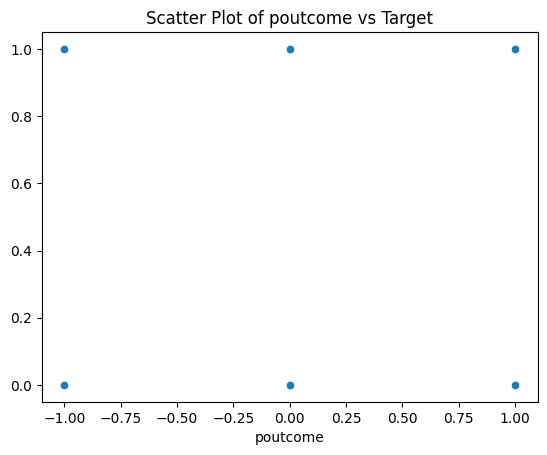

In [28]:
for column in X1_subset_reduced.select_dtypes(include=['float', 'int']).columns:
    sns.scatterplot(data=X1_subset, x=column, y=y1_subset.values.flatten())
    plt.title(f'Scatter Plot of {column} vs Target')
    plt.show()

In [29]:
X1_subset_reduced = X1_subset_reduced.drop(columns=['day_of_week'], axis=1)

In [30]:
y1_subset

,y
37735,1
44332,1
4432,0
38725,1
38581,0
...,...
15913,0
20622,1
41684,0
32749,0


In [31]:
from statsmodels.graphics.mosaicplot import mosaic

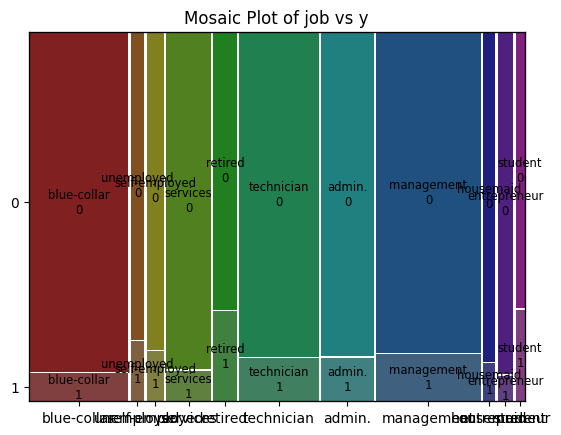

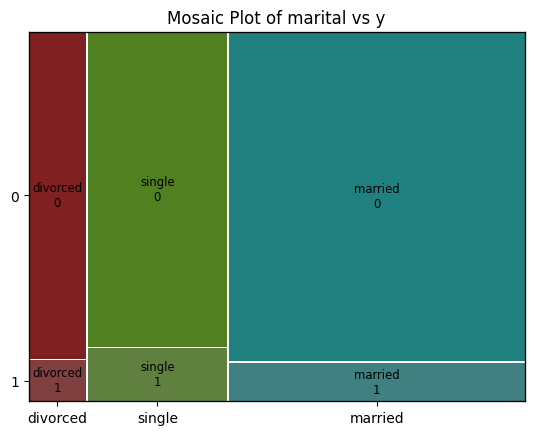

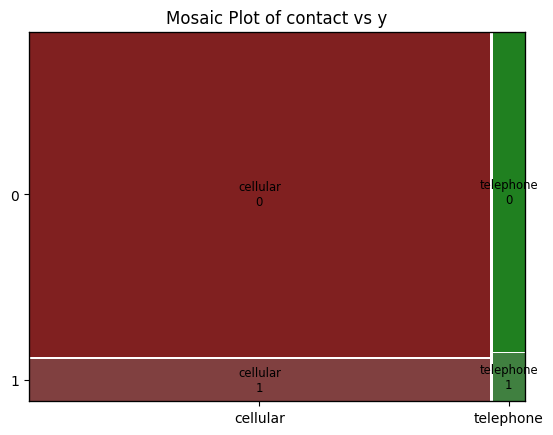

In [32]:
df = pd.concat([X1_subset, y1_subset], axis=1)

# Define the dependent variable name for convenience
dependent_variable = 'y'

# Plot mosaic plots
for column in X1_subset.select_dtypes(include=['object', 'category']).columns:
    mosaic(df, [column, dependent_variable])
    plt.title(f'Mosaic Plot of {column} vs {dependent_variable}')
    plt.show()



In [33]:
#X1_subset_reduced = X1_subset_reduced.drop(columns=['contact','job','education'], axis=1)
def return_categorical(df):
    return df.select_dtypes(include=['object'])
categorical_columns = list(return_categorical(X1_subset_reduced).columns)
X1_subset_reduced = pd.get_dummies(X1_subset_reduced, columns=categorical_columns)



In [34]:
X1_subset_reduced

,age,education,default,balance,housing,loan,month,duration,campaign,pdays,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
37735,40,1,0,973,0,0,5,449,1,-1,...,False,False,False,False,False,True,False,False,True,False
44332,35,2,0,154,0,0,7,200,4,181,...,False,False,False,False,True,False,False,True,True,False
4432,38,1,0,736,1,0,5,775,1,-1,...,True,False,False,False,False,False,True,False,True,False
38725,35,1,0,205,1,1,5,1313,7,312,...,False,False,False,False,False,False,True,False,True,False
38581,44,1,0,532,1,0,5,550,2,340,...,False,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,40,1,0,939,1,0,7,87,3,-1,...,False,True,False,False,False,False,True,False,True,False
20622,38,2,0,1223,0,0,8,1092,5,-1,...,False,False,False,False,False,False,True,False,True,False
41684,50,0,0,383,0,0,10,382,2,-1,...,False,False,False,False,False,False,True,False,False,True
32749,38,2,0,2273,1,0,4,222,1,-1,...,False,False,False,True,False,False,False,True,True,False


In [35]:
y1_subset

,y
37735,1
44332,1
4432,0
38725,1
38581,0
...,...
15913,0
20622,1
41684,0
32749,0


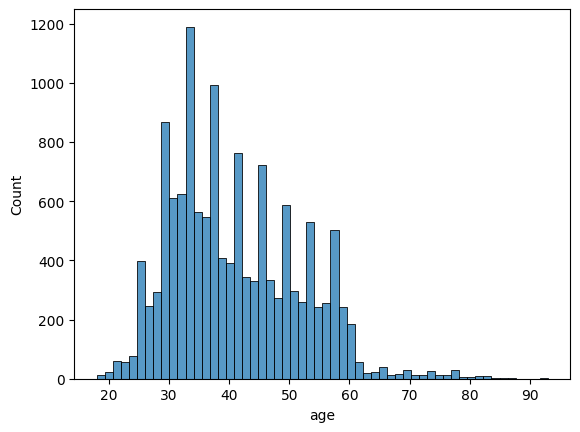

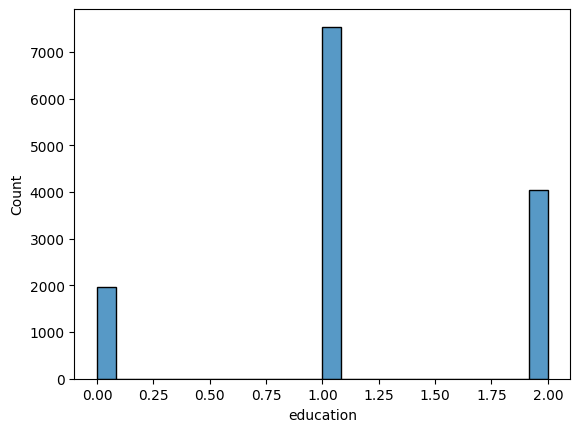

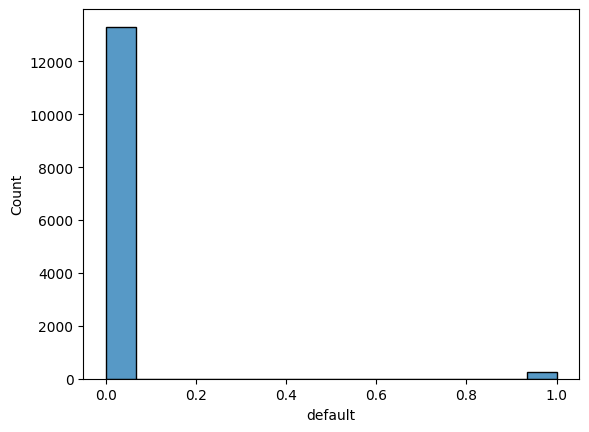

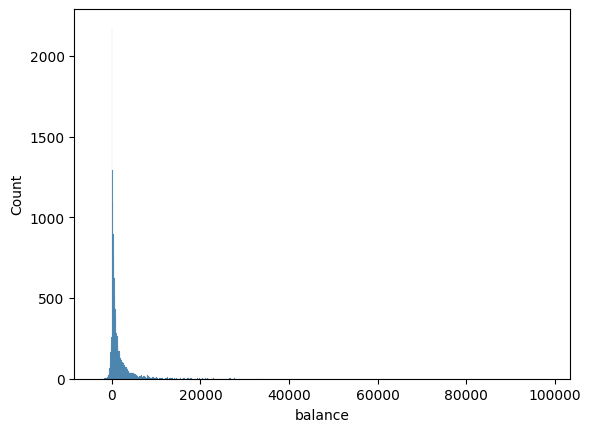

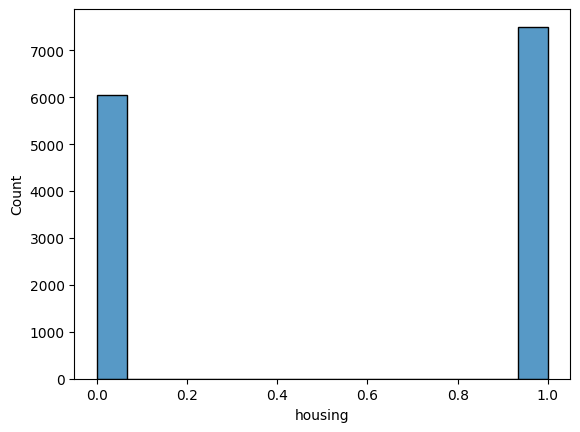

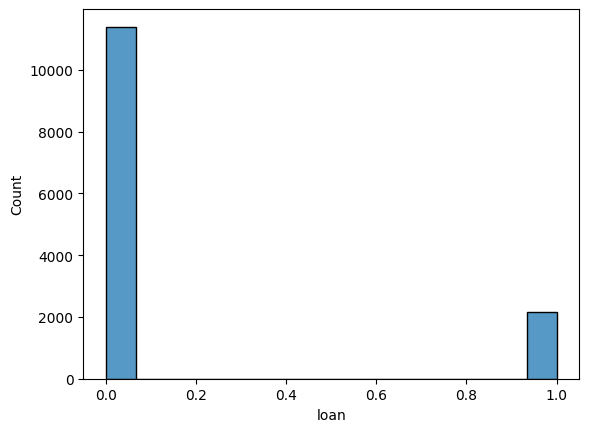

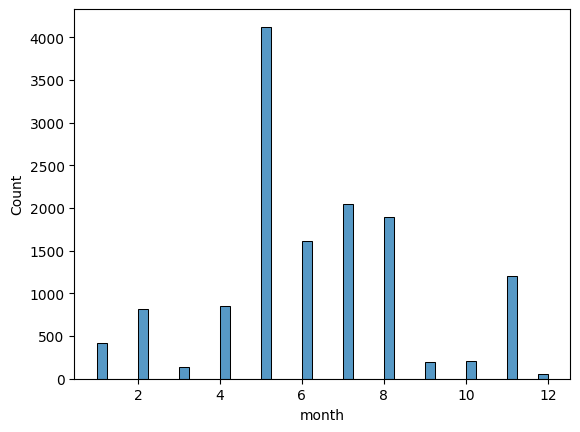

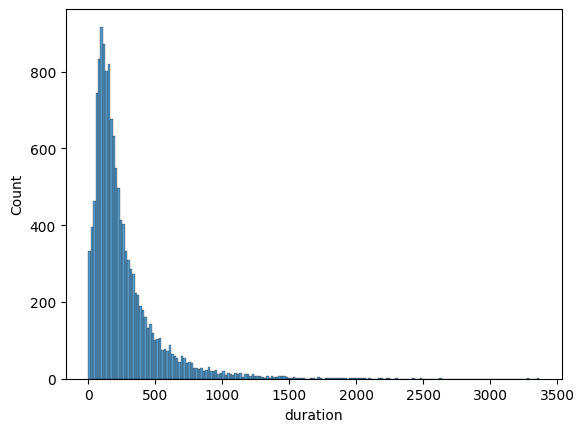

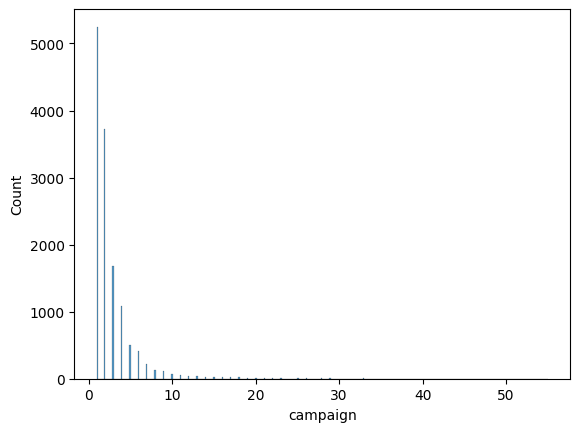

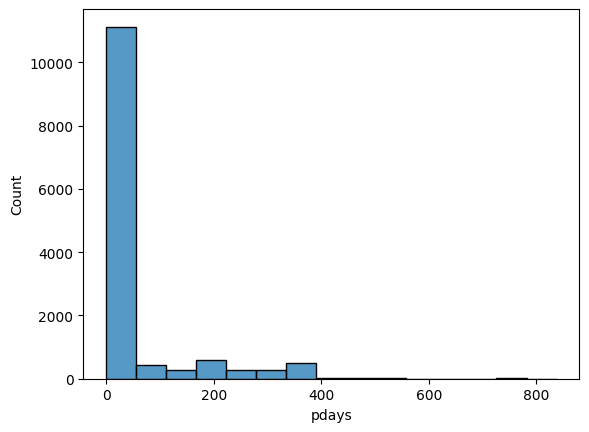

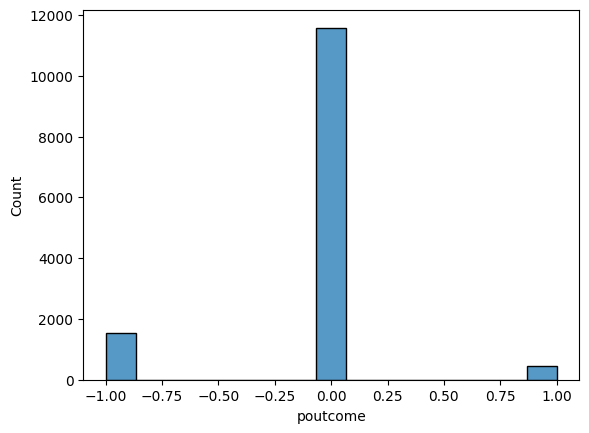

In [36]:
for column in X1_subset_reduced.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=X1_subset_reduced, x=column)
    plt.show()

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
#X1_subset_reduced
scaler = StandardScaler()
X1_subset_reduced = scaler.fit_transform(X1_subset_reduced)

In [38]:
X1_subset_reduced

array([[-0.09992887, -0.23749435, -0.13730897, ..., -0.62658423,
         0.26275771, -0.26275771],
       [-0.57115514,  1.305309  , -0.13730897, ...,  1.59595461,
         0.26275771, -0.26275771],
       [-0.28841938, -0.23749435, -0.13730897, ..., -0.62658423,
         0.26275771, -0.26275771],
       ...,
       [ 0.84252366, -1.78029771, -0.13730897, ..., -0.62658423,
        -3.80578747,  3.80578747],
       [-0.28841938,  1.305309  , -0.13730897, ...,  1.59595461,
         0.26275771, -0.26275771],
       [ 1.12525943, -0.23749435, -0.13730897, ...,  1.59595461,
         0.26275771, -0.26275771]])

In [39]:
X1_subset_reduced = pd.DataFrame(X1_subset_reduced)

In [40]:
X1_subset_reduced

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.099929,-0.237494,-0.137309,-0.129401,-1.112948,-0.436407,-0.475227,0.762926,-0.575244,-0.414756,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,2.758997,-1.229763,-0.626584,0.262758,-0.262758
1,-0.571155,1.305309,-0.137309,-0.403820,-1.112948,-0.436407,0.355173,-0.225370,0.398257,1.384066,...,-0.196244,-0.322105,-0.14007,-0.450809,5.850741,-0.362451,-1.229763,1.595955,0.262758,-0.262758
2,-0.288419,-0.237494,-0.137309,-0.208812,0.898515,-0.436407,-0.475227,2.056840,-0.575244,-0.414756,...,5.095704,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
3,-0.571155,-0.237494,-0.137309,-0.386731,0.898515,2.291439,-0.475227,4.192194,1.371758,2.678822,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
4,0.277052,-0.237494,-0.137309,-0.277165,0.898515,-0.436407,-0.475227,1.163801,-0.250744,2.955564,...,-0.196244,3.104582,-0.14007,-0.450809,-0.170919,-0.362451,-1.229763,1.595955,0.262758,-0.262758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.099929,-0.237494,-0.137309,-0.140794,0.898515,-0.436407,0.355173,-0.673874,0.073757,-0.414756,...,-0.196244,3.104582,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
13560,-0.288419,1.305309,-0.137309,-0.045635,-1.112948,-0.436407,0.770373,3.315032,0.722758,-0.414756,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
13561,0.842524,-1.780298,-0.137309,-0.327090,-1.112948,-0.436407,1.600774,0.496999,-0.250744,-0.414756,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,-3.805787,3.805787
13562,-0.288419,1.305309,-0.137309,0.306183,0.898515,-0.436407,-0.890428,-0.138051,-0.575244,-0.414756,...,-0.196244,-0.322105,-0.14007,2.218233,-0.170919,-0.362451,-1.229763,1.595955,0.262758,-0.262758


In [41]:
#%pip install imblearn
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X1_subset_reduced, y1_subset)

# Convert back to DataFrame if needed
#X1_subset_reduced = pd.DataFrame(X_train_res, columns=X1_subset_reduced.columns)


In [42]:
X1_subset_reduced

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.099929,-0.237494,-0.137309,-0.129401,-1.112948,-0.436407,-0.475227,0.762926,-0.575244,-0.414756,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,2.758997,-1.229763,-0.626584,0.262758,-0.262758
1,-0.571155,1.305309,-0.137309,-0.403820,-1.112948,-0.436407,0.355173,-0.225370,0.398257,1.384066,...,-0.196244,-0.322105,-0.14007,-0.450809,5.850741,-0.362451,-1.229763,1.595955,0.262758,-0.262758
2,-0.288419,-0.237494,-0.137309,-0.208812,0.898515,-0.436407,-0.475227,2.056840,-0.575244,-0.414756,...,5.095704,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
3,-0.571155,-0.237494,-0.137309,-0.386731,0.898515,2.291439,-0.475227,4.192194,1.371758,2.678822,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
4,0.277052,-0.237494,-0.137309,-0.277165,0.898515,-0.436407,-0.475227,1.163801,-0.250744,2.955564,...,-0.196244,3.104582,-0.14007,-0.450809,-0.170919,-0.362451,-1.229763,1.595955,0.262758,-0.262758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.099929,-0.237494,-0.137309,-0.140794,0.898515,-0.436407,0.355173,-0.673874,0.073757,-0.414756,...,-0.196244,3.104582,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
13560,-0.288419,1.305309,-0.137309,-0.045635,-1.112948,-0.436407,0.770373,3.315032,0.722758,-0.414756,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,0.262758,-0.262758
13561,0.842524,-1.780298,-0.137309,-0.327090,-1.112948,-0.436407,1.600774,0.496999,-0.250744,-0.414756,...,-0.196244,-0.322105,-0.14007,-0.450809,-0.170919,-0.362451,0.813165,-0.626584,-3.805787,3.805787
13562,-0.288419,1.305309,-0.137309,0.306183,0.898515,-0.436407,-0.890428,-0.138051,-0.575244,-0.414756,...,-0.196244,-0.322105,-0.14007,2.218233,-0.170919,-0.362451,-1.229763,1.595955,0.262758,-0.262758


In [43]:
X1_subset_reduced.to_csv('bankmarketing_X.csv', index=False)
X2.to_csv('breastcancer_X.csv', index=False)
y1_subset.to_csv('bankmarketing_Y.csv', index=False)
y2.to_csv('breastcancer_Y.csv', index=False)
